In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

path = "../data/raw/M87_EHT_2018_3644_b3.fits"
hdul = fits.open(path)

In [3]:
# should compress the shape from (1, 1, 128, 128) to (128,128)
img_raw = hdul[0].data
img = np.squeeze(img_raw)
print(img.shape)

print('')
hdul.info()

print('')
hdul[0].header

(128, 128)

Filename: ../data/raw/M87_EHT_2018_3644_b3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (128, 128, 1, 1)   float64   
  1  AIPS CC       1 BinTableHDU     30   15223R x 7C   [1E, 1E, 1E, 1E, 1E, 1E, 1E]   



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
OBJECT  = 'M87     '                                                            
TELESCOP= 'EHT     '                                                            
INSTRUME= 'EHT     '                                                            
OBSERVER= 'EHT     '                                                            
DATE    = '2023-11-30'      

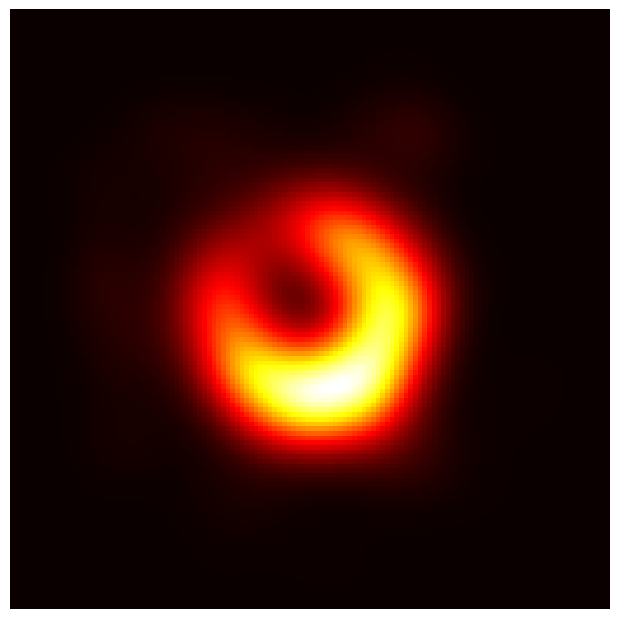

In [ ]:
# raw, ungraphed image
img = np.squeeze(fits.getdata(path))

plt.figure(figsize=(6,6))

# no interpolation to show actual interpolation
plt.imshow(img, cmap='hot', origin='lower', interpolation='nearest')

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

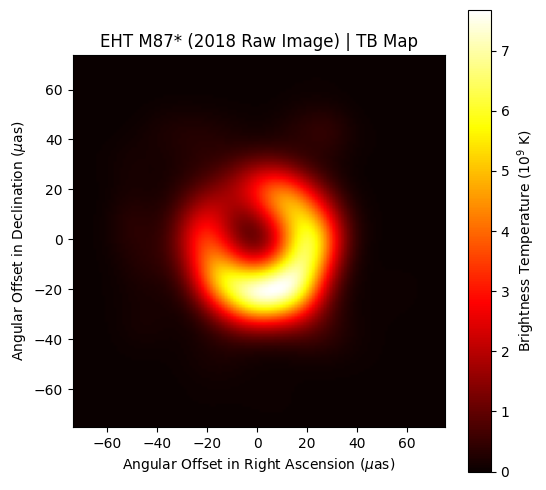

Angular Offset describes the position of each pixel relative to the blackhole image center
Declination is the North-South offset
Ascension is the East-West offset
Remember arcseconds (as) are 1/3600 of a degree


In [4]:
# raw labeled graph
img = np.squeeze(fits.getdata(path))
hdr = fits.getheader(path)

# arcseconds are used mainly for astronomical purposes as you can't really measure physical seperation to stars
# so astronomers opted to use angular seperation

# pixel scale -> micro arcseconds
# CDELT1 or CDELT2 is degrees per pixel
px = hdr["CDELT1"] * 3600 * 1e6 
py = hdr["CDELT2"] * 3600 * 1e6

# axes centered at 0 micro arcseconds
nx, ny = img.shape
x = (np.arange(nx) - nx//2) * px 
y = (np.arange(ny) - ny//2) * py

# plot
# origin (image) is flipped because thats how sky is seen by astronomers
# inferno is just a colour map of yellow -> red -> purple -> black
plt.figure(figsize=(6,6))
im = plt.imshow(img, cmap='hot', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])

cbar = plt.colorbar(im)
cbar.set_label("Brightness Temperature ($10^9$ K)")

plt.xlabel(r"Angular Offset in Right Ascension ($\mu$as)")
plt.ylabel(r"Angular Offset in Declination ($\mu$as)")
plt.title("EHT M87* (2018 Raw Image) | TB Map") # TB map is just Brightness Temperature Map
plt.show()

print('Angular Offset describes the position of each pixel relative to the blackhole image center')
print('Declination is the North-South offset')
print('Ascension is the East-West offset')
print('Remember arcseconds (as) are 1/3600 of a degree') 

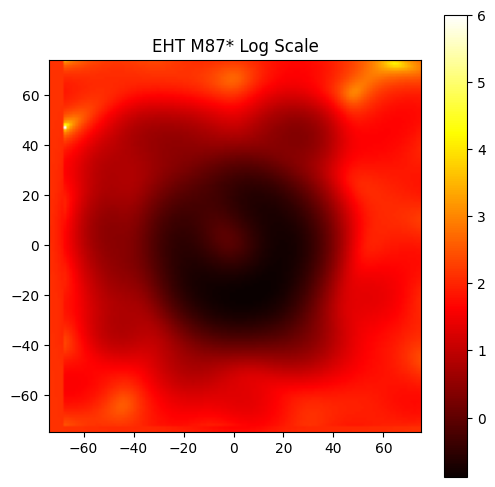

In [5]:
# log graph
img_log = -np.log10(img - img.min() + 1e-6)

plt.figure(figsize=(6,6))
plt.imshow(img_log, cmap='hot', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.title("EHT M87* Log Scale")
plt.show()
# pretty sure that this graph shows that the leftmost part of the image is not needed for log graph
# values range from 6 (faintest) to 0 (brightest)
# tried fixing it using extent in plt.imshow but didn't work

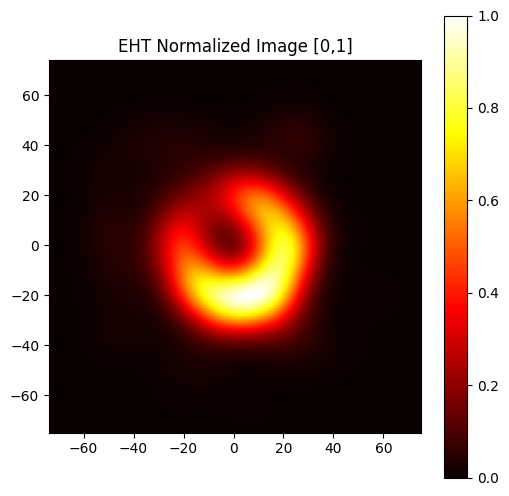

In [6]:
# normalized graph
img_norm = (img - img.min()) / (img.max() - img.min())

plt.figure(figsize=(6,6))
plt.imshow(img_norm, cmap='hot', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.title("EHT Normalized Image [0,1]")
plt.show()
# note to self that normalized graphs hides the spatial values (like arc seconds), they're still in array (x, y)
# they only show normalized pixel values (at least for this one) from 0 -> 1
# this makes them very good for machine learning